In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
df = pd.read_csv('weblogs.csv')
df.head()

,ID,NUMBER_OF_REQUESTS,TOTAL_DURATION,AVERAGE_TIME,STANDARD_DEVIATION,REPEATED_REQUESTS,HTTP_RESPONSE_2XX,HTTP_RESPONSE_3XX,HTTP_RESPONSE_4XX,HTTP_RESPONSE_5XX,...,DEPTH,STD_DEPTH,CONSECUTIVE,DATA,PPI,SF_REFERRER,SF_FILETYPE,MAX_BARRAGE,PENALTY,ROBOT
0,obSnwGoBCue8G08E_WCX,79,592,7.589744,1.800540,0.000000,0.873418,0.126582,0.000000,0.000000,...,4.0,0.494041,0.101266,1555089.0,2.718334e+07,0.000000,0.205128,1,0,1
1,nLSnwGoBCue8G08E_WCX,350,103621,296.908300,260.332670,0.000000,0.997143,0.000000,0.002857,0.000000,...,6.0,0.341303,0.425714,2071344.0,1.427714e+01,0.547278,0.461318,4,0,1
2,ErSowGoBCue8G08ECmHa,15,368,26.285715,87.329780,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.0,0.000000,0.000000,49505.0,1.413333e+01,0.642857,1.000000,2,0,0
3,E7SowGoBCue8G08ECmHa,28,11,0.407407,1.097447,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.0,0.000000,0.821429,45984.0,1.332143e+01,0.037037,0.148148,5,0,0
4,FbSowGoBCue8G08ECmHa,9342,80946,8.665668,17.566462,0.000107,0.996896,0.002569,0.000214,0.000321,...,4.0,0.152943,0.953757,83171793.0,1.307407e+01,0.000000,0.023552,1,0,1


In [6]:
df = df.drop(['NIGHT', 'ID'], axis=1)
df = df.drop('OTHER_METHOD', axis=1)

In [7]:
X = df.loc[:, df.columns != 'ROBOT']
y = df['ROBOT']
print(X.shape, y.shape)

(67352, 28) (67352,)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(53881, 28) (13471, 28) (53881,) (13471,)


In [9]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [10]:
from sklearn.preprocessing import StandardScaler

numeric_cols = X.select_dtypes(['int64', 'float64']).columns

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [5, 10, 20, 30, 40, 50, 100],
    'max_depth' : [1, 5, 10, 15, 20, 25, 30],
    'min_samples_leaf' : [1, 2, 4],
    'min_samples_split' : [2, 5, 10],
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 441 candidates, totalling 1323 fits


{'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 30}

In [14]:
grid_search.best_score_

0.9786195215427371

In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_test_pred = cross_val_predict(rf, X_test, y_test, cv=3)

cm = confusion_matrix(y_test, y_test_pred)
cm

array([[10626,   159],
       [  226,  2460]], dtype=int64)

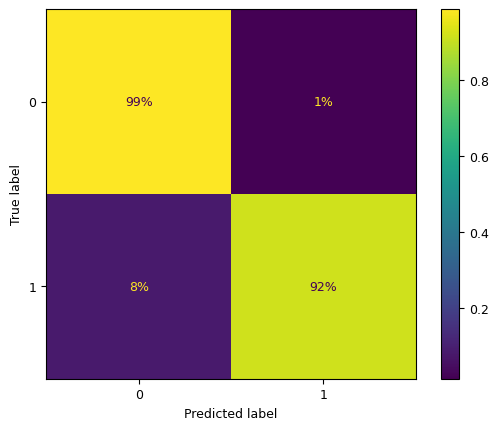

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, normalize="true", values_format='.0%')
plt.show()

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     10785
           1       0.94      0.92      0.93      2686

    accuracy                           0.97     13471
   macro avg       0.96      0.95      0.95     13471
weighted avg       0.97      0.97      0.97     13471



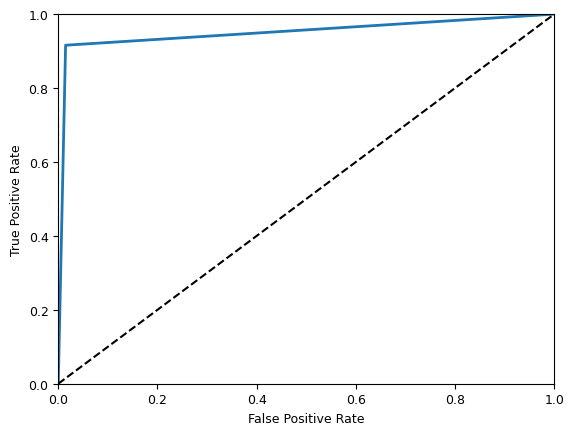

In [17]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [18]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_test_pred)

0.9505586583500499

In [20]:
clf = RandomForestClassifier(n_estimators=30, max_depth=25, min_samples_split=2, min_samples_leaf=1)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, n_estimators=30)

In [21]:
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9796600103926955
